<h1>Análisis Inicial Imagen Digital</h1>
<h2>Práctica 1.2</h2>
<h3>Equipo</h3>
<ul>
    <li>Iker Antonio Pluma Amaro</li>
    <li>Álvaro García Vásquez</li>
    <li>Luis Alfredo Cuamatzi Flores</li>
    <li>Fernando Daniel Portilla Posadas</li>
</ul>

Librerias

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import *

Lectura de imagen

In [12]:
img = cv2.imread('image.jpg')

Mostrar imagen

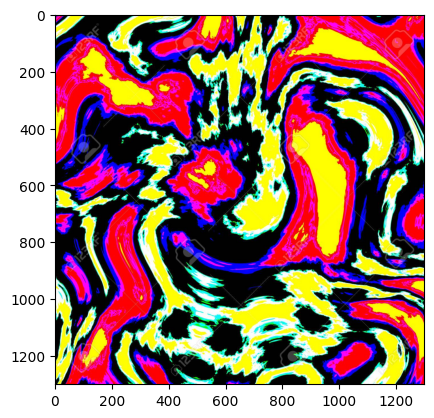

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Función para obtener histogramas (R, G, B), incluyendo el ploteo de los mismos.

In [14]:
def Histograms(img):

    img = np.array(img)

    height, width, RGB = img.shape
    rows = height
    columns = width
    R, G, B = 0, 1, 2

    histogramR = np.zeros(256)
    histogramG = np.zeros(256)
    histogramB = np.zeros(256)

    for row in range(rows):
        for column in range(columns):
            histogramR[img[row][column][R]] += 1
            histogramG[img[row][column][G]] += 1
            histogramB[img[row][column][B]] += 1

    plt.figure(figsize=(10, 6))
    plt.bar(range(256), histogramR, color='red', label='R')
    plt.bar(range(256), histogramG, bottom=histogramR, color='green', label='G')
    plt.bar(range(256), histogramB, bottom=histogramR+histogramG, color='blue', label='B')
    plt.title('Histogramas RGB')
    plt.xlabel('Valor de píxel')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid()
    plt.show()


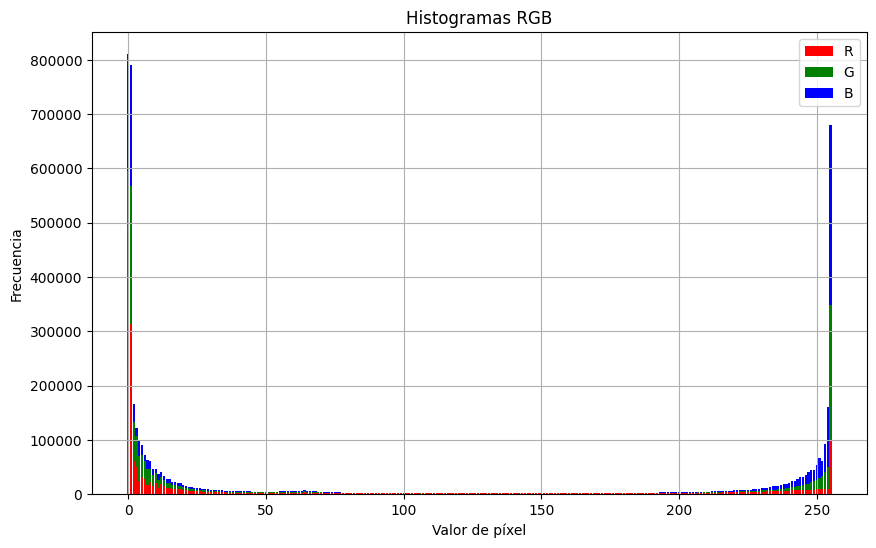

In [15]:
Histograms(img)

Generación de sub-ventana de forma manual (de la misma imagen).

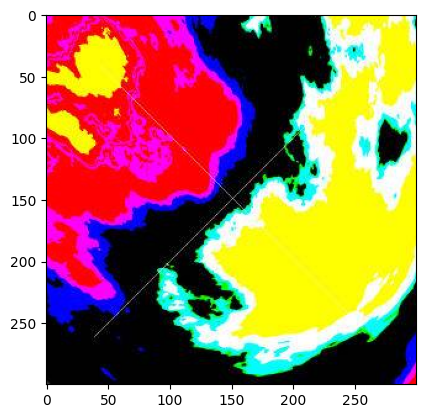

In [16]:
#Imagen de 300x300 (practicamente es el centro de la imagen principal)
sub_img = img[500:800, 500:800]

plt.imshow(cv2.cvtColor(sub_img, cv2.COLOR_BGR2RGB))
plt.show()

Convertir sub-ventana a escala de grises.

In [17]:
def convertirEscalaGrises(I):
    #Se crea una copia de la imagen original
    imagenTransformada = np.copy(I)
    #Se obtiene el tamaño de la imagen
    n,m = I.shape[0:2]

    img = np.zeros((n,m),dtype=np.uint8)

    #Se convierte en escala de grises
    for x in range(0,m):
        for y in range(0,n):
            img[x,y] = 0.299*imagenTransformada[x,y,0]+0.587*imagenTransformada[x,y,1]+0.114*imagenTransformada[x,y,2]
    return img

(300, 300)


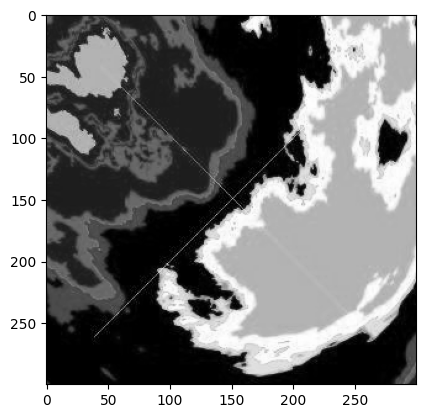

In [18]:
#Se convierte la imagen a escala de grises
img_gris = convertirEscalaGrises(sub_img)
print(img_gris.shape)

plt.imshow(cv2.cvtColor(img_gris, cv2.COLOR_BGR2RGB))
plt.show()

Histograma de la sub-ventana en escala de grises.

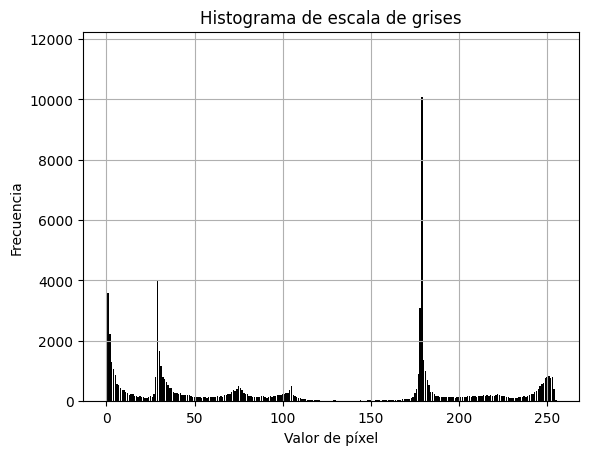

In [19]:
def histogramaEG(I):
    arrayImg = np.array(I)
    n, m = I.shape 
    hist = [0] * 256
    for y in range(m):
        for x in range(n):
            intensidad = int(arrayImg[y, x])
            hist[intensidad] += 1
    return hist

plt.bar(range(256), histogramaEG(img_gris), color='black')
plt.title('Histograma de escala de grises')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

De forma aleatoria considerar 5 filas y graficar sus valores de intensidad para analizar las transiciones.

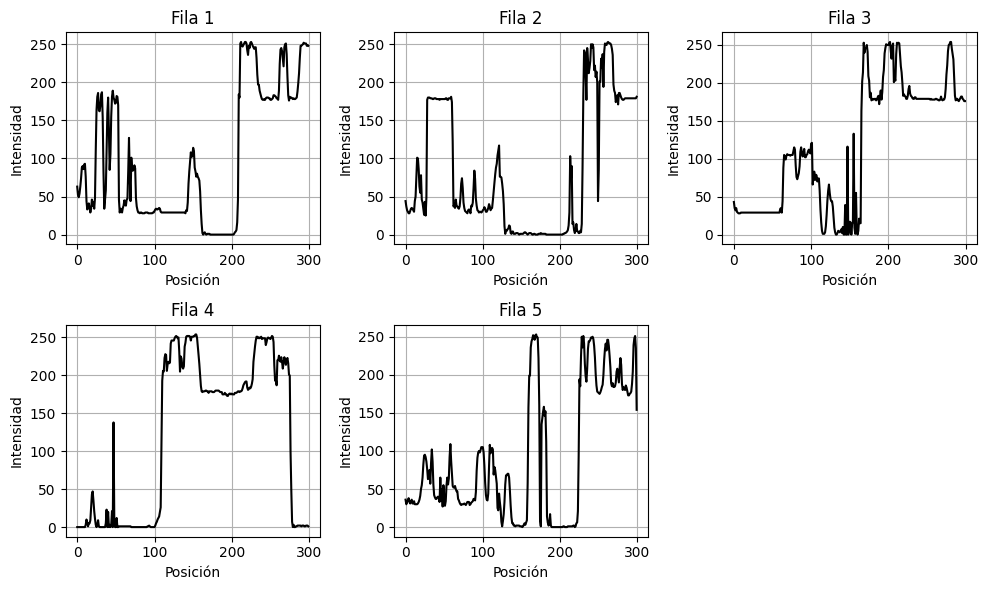

In [21]:
#Genera de manera aleatoria 5 numeros entre 0 y 300
random_numbers = np.random.randint(0, 300, size=5)

row1 = img_gris[random_numbers[0]]
row2 = img_gris[random_numbers[1]]
row3 = img_gris[random_numbers[2]]
row4 = img_gris[random_numbers[3]]
row5 = img_gris[random_numbers[4]]

#Se grafican las filas aleatorias
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.plot(row1, color='black')
plt.title('Fila 1')
plt.xlabel('Posición')
plt.ylabel('Intensidad')
plt.grid()

plt.subplot(2, 3, 2)
plt.plot(row2, color='black')
plt.title('Fila 2')
plt.xlabel('Posición')
plt.ylabel('Intensidad')
plt.grid()

plt.subplot(2, 3, 3)
plt.plot(row3, color='black')
plt.title('Fila 3')
plt.xlabel('Posición')
plt.ylabel('Intensidad')
plt.grid()

plt.subplot(2, 3, 4)
plt.plot(row4, color='black')
plt.title('Fila 4')
plt.xlabel('Posición')
plt.ylabel('Intensidad')
plt.grid()

plt.subplot(2, 3, 5)
plt.plot(row5, color='black')
plt.title('Fila 5')
plt.xlabel('Posición')
plt.ylabel('Intensidad')
plt.grid()

plt.tight_layout()
plt.show()

